In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score
from sklearn.datasets import load_iris
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score



## Import Data

In [2]:
match_data = pd.read_csv("match_data.csv")

## Data Summary

In [3]:
match_data.head()


,fixture_id,halftime,current_time,half_start_datetime,match_start_datetime,minute,second,latest_bookmaker_update,suspended,stopped,...,Throwins - home,Total Crosses - away,Total Crosses - home,Yellowcards - away,Yellowcards - home,Yellowred Cards - away,Yellowred Cards - home,current_state,final_score,result
0,19172016.0,1st-half,2024-08-09 18:11:36,2024-08-09 18:01:37,2024-08-09 18:01:37,9,59,2024-08-09 18:11:28,False,False,...,1.0,0.0,3.0,0.0,0.0,0.0,0.0,X,2-1,1
1,19172016.0,1st-half,2024-08-09 18:27:30,2024-08-09 18:01:37,2024-08-09 18:01:37,25,53,2024-08-09 18:27:24,False,False,...,11.0,1.0,12.0,0.0,0.0,0.0,0.0,X,2-1,1
2,19172016.0,1st-half,2024-08-09 18:28:25,2024-08-09 18:01:37,2024-08-09 18:01:37,26,48,2024-08-09 18:28:20,False,False,...,11.0,1.0,13.0,0.0,0.0,0.0,0.0,X,2-1,1
3,19172016.0,1st-half,2024-08-09 18:29:32,2024-08-09 18:01:37,2024-08-09 18:01:37,27,55,2024-08-09 18:29:28,False,False,...,11.0,1.0,13.0,0.0,0.0,0.0,0.0,X,2-1,1
4,19172016.0,1st-half,2024-08-09 18:30:37,2024-08-09 18:01:37,2024-08-09 18:01:37,29,0,2024-08-09 18:30:32,True,False,...,11.0,1.0,14.0,0.0,0.0,0.0,0.0,X,2-1,1


In [4]:
match_data.head()
with pd.option_context("display.max_columns", None):
    print(match_data.head(2))

   fixture_id  halftime         current_time  half_start_datetime  \
0  19172016.0  1st-half  2024-08-09 18:11:36  2024-08-09 18:01:37   
1  19172016.0  1st-half  2024-08-09 18:27:30  2024-08-09 18:01:37   

  match_start_datetime  minute  second latest_bookmaker_update  suspended  \
0  2024-08-09 18:01:37       9      59     2024-08-09 18:11:28      False   
1  2024-08-09 18:01:37      25      53     2024-08-09 18:27:24      False   

   stopped     1     2    X                      name  ticking  \
0    False  1.22  10.0  6.5  Galatasaray vs Hatayspor     True   
1    False  1.20  13.0  6.0  Galatasaray vs Hatayspor     True   

   Accurate Crosses - away  Accurate Crosses - home  Assists - away  \
0                      0.0                      0.0             NaN   
1                      0.0                      1.0             NaN   

   Assists - home  Attacks - away  Attacks - home  Ball Possession % - away  \
0             NaN             2.0            18.0                   

In [5]:
match_data.describe()

,fixture_id,minute,second,1,2,X,Accurate Crosses - away,Accurate Crosses - home,Assists - away,Assists - home,...,Tackles - away,Tackles - home,Throwins - away,Throwins - home,Total Crosses - away,Total Crosses - home,Yellowcards - away,Yellowcards - home,Yellowred Cards - away,Yellowred Cards - home
count,6.394400e+04,63944.000000,63944.000000,63944.000000,63944.000000,63944.000000,60916.000000,60937.000000,36010.000000,36013.000000,...,61984.000000,61995.000000,62811.000000,62818.000000,61729.000000,61740.000000,63864.000000,63875.000000,40700.000000,40707.000000
mean,1.914800e+07,25.476526,27.695421,18.510137,29.482377,8.698023,2.010276,2.631209,0.812746,0.901397,...,8.411122,8.613533,8.751254,9.090722,7.766755,9.851749,0.911640,0.802630,0.011794,0.005503
std,1.345825e+04,14.496434,18.289720,64.166275,82.639170,12.092077,1.950212,2.292960,0.794087,0.826550,...,5.695672,5.720836,5.957945,6.351125,6.054359,7.351268,1.166182,1.069864,0.117546,0.073977
min,1.913445e+07,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.913530e+07,13.000000,10.000000,1.330000,1.950000,3.000000,0.000000,1.000000,0.000000,0.000000,...,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,0.000000,0.000000,0.000000,0.000000
50%,1.913974e+07,25.000000,27.000000,2.500000,4.000000,3.750000,2.000000,2.000000,1.000000,1.000000,...,8.000000,8.000000,8.000000,8.000000,7.000000,9.000000,1.000000,0.000000,0.000000,0.000000
75%,1.915513e+07,38.000000,44.000000,5.500000,13.000000,7.500000,3.000000,4.000000,1.000000,1.000000,...,12.000000,13.000000,13.000000,13.000000,11.000000,14.000000,1.000000,1.000000,0.000000,0.000000
max,1.917212e+07,80.000000,59.000000,501.000000,501.000000,51.000000,12.000000,14.000000,5.000000,6.000000,...,33.000000,33.000000,34.000000,45.000000,45.000000,46.000000,9.000000,7.000000,2.000000,1.000000


In [6]:
[x for x in match_data.columns]

['fixture_id',
 'halftime',
 'current_time',
 'half_start_datetime',
 'match_start_datetime',
 'minute',
 'second',
 'latest_bookmaker_update',
 'suspended',
 'stopped',
 '1',
 '2',
 'X',
 'name',
 'ticking',
 'Accurate Crosses - away',
 'Accurate Crosses - home',
 'Assists - away',
 'Assists - home',
 'Attacks - away',
 'Attacks - home',
 'Ball Possession % - away',
 'Ball Possession % - home',
 'Ball Safe - away',
 'Ball Safe - home',
 'Challenges - away',
 'Challenges - home',
 'Corners - away',
 'Corners - home',
 'Counter Attacks - away',
 'Counter Attacks - home',
 'Dangerous Attacks - away',
 'Dangerous Attacks - home',
 'Dribble Attempts - away',
 'Dribble Attempts - home',
 'Fouls - away',
 'Fouls - home',
 'Free Kicks - away',
 'Free Kicks - home',
 'Goal Attempts - away',
 'Goal Attempts - home',
 'Goal Kicks - away',
 'Goal Kicks - home',
 'Goals - away',
 'Goals - home',
 'Headers - away',
 'Headers - home',
 'Hit Woodwork - away',
 'Hit Woodwork - home',
 'Injuries - away

# Null Values

In [7]:
match_data.isna().sum().sort_values()

fixture_id                    0
Shots Total - home            0
Shots Total - away            0
Score Change - home           0
Score Change - away           0
                          ...  
Counter Attacks - away    41211
Injuries - home           46316
Injuries - away           46318
Free Kicks - away         58465
Free Kicks - home         58465
Length: 106, dtype: int64

## Number of Minutes Available in Matches

In [8]:
match_data.groupby("fixture_id")["minute"].size().sort_values()

fixture_id
19172016.0     39
19172012.0     47
19172089.0     52
19172085.0     54
19172014.0     70
             ... 
19135321.0    109
19134483.0    109
19172104.0    110
19139727.0    113
19139657.0    129
Name: minute, Length: 648, dtype: int64

## Odd Changes By Goals

In [9]:
matches_with_home_goals = sorted(list(set(match_data[match_data["Score Change - home"] == 1]["fixture_id"])))

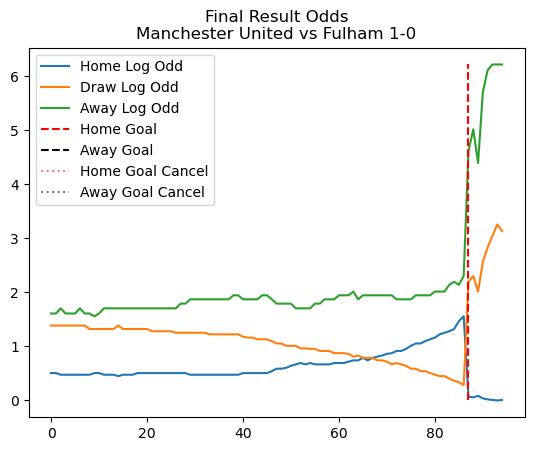

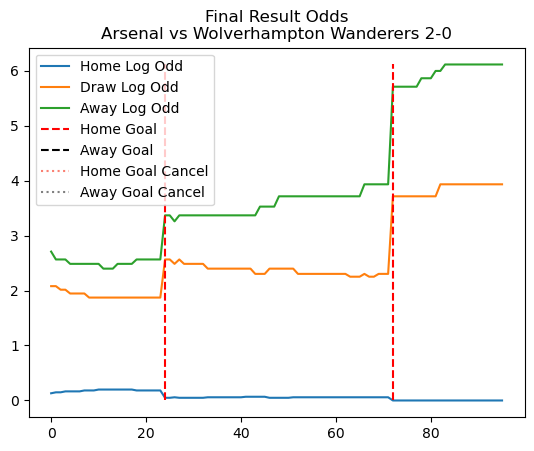

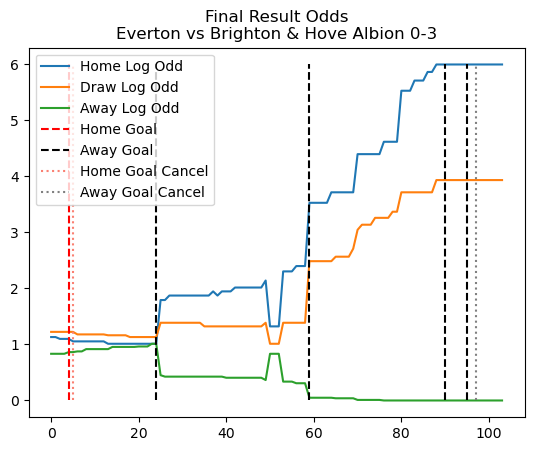

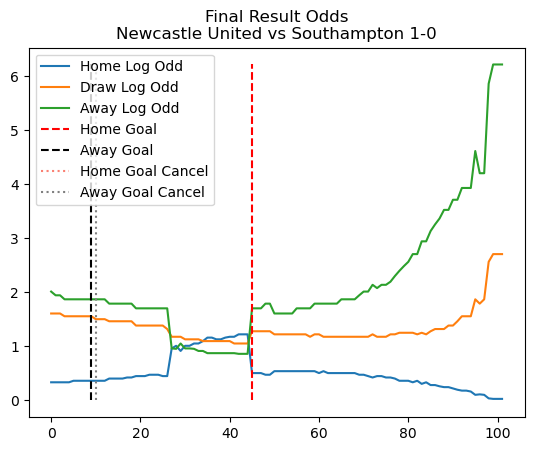

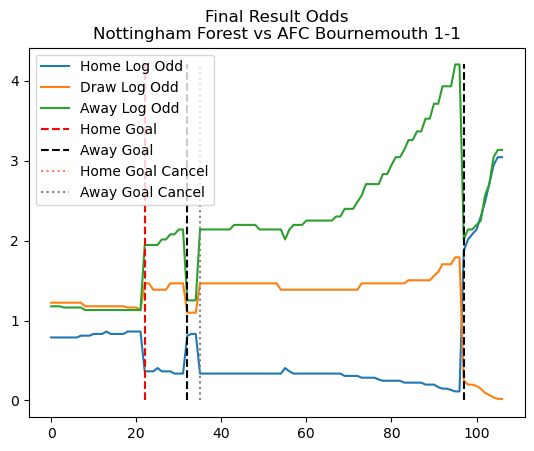

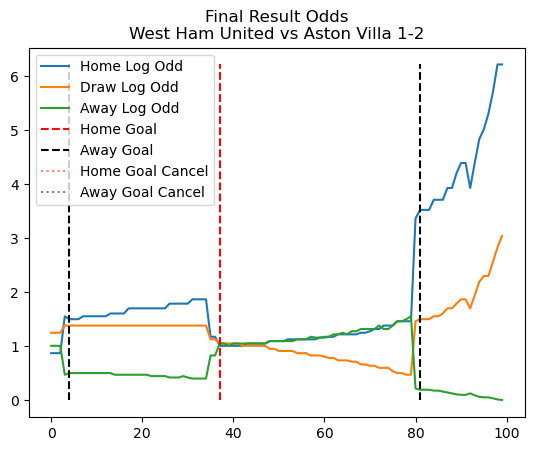

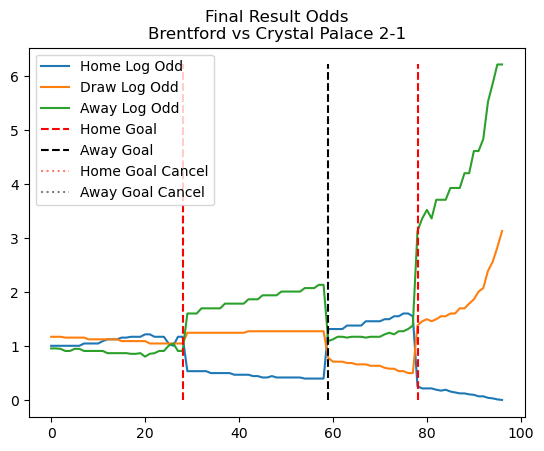

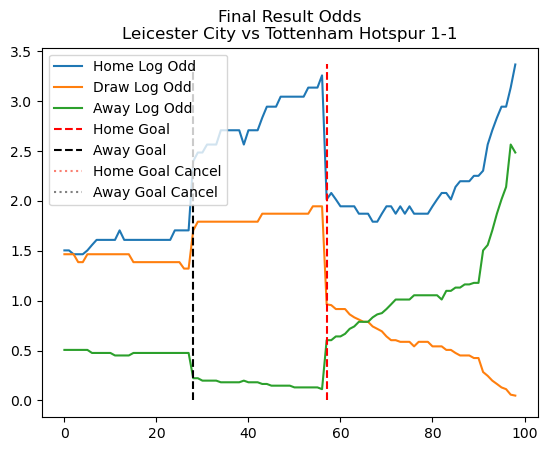

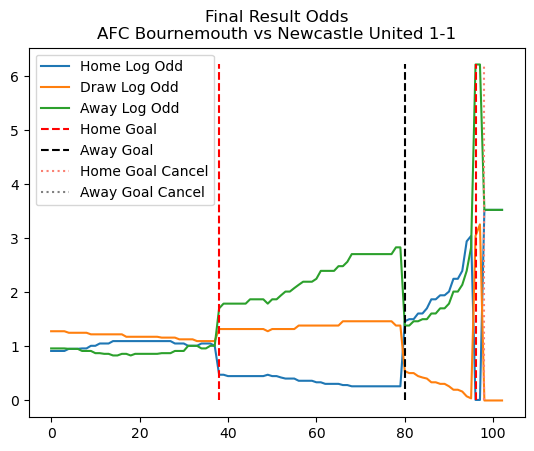

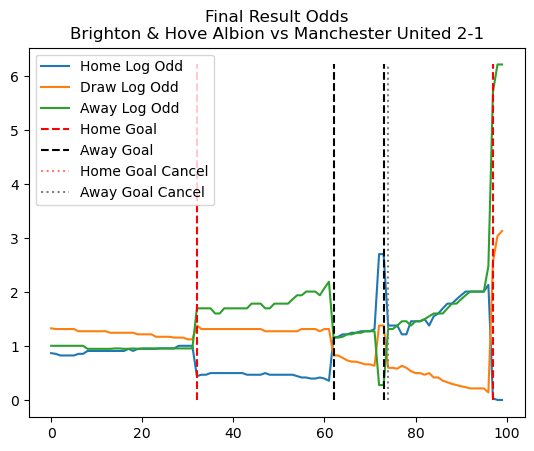

In [10]:
for selected_match in matches_with_home_goals[:10]: # show some of the games
    selected_match_data = match_data[match_data["fixture_id"] == selected_match].reset_index(drop=True)

    plt.plot(np.log(selected_match_data["1"]))
    plt.plot(np.log(selected_match_data["X"]))
    plt.plot(np.log(selected_match_data["2"]))

    plt.title("Final Result Odds\n" + selected_match_data["name"][0] + " " + selected_match_data["final_score"][0])

    plt.vlines(np.where(selected_match_data["Score Change - home"] == 1),0,np.log(selected_match_data[["1","2","X"]].max().max()),color="red",linestyles="dashed")
    plt.vlines(np.where(selected_match_data["Score Change - away"] == 1),0,np.log(selected_match_data[["1","2","X"]].max().max()),color="black",linestyles="dashed")
    plt.vlines(np.where(selected_match_data["Score Change - home"] == -1),0,np.log(selected_match_data[["1","2","X"]].max().max()),color="salmon",linestyles="dotted")
    plt.vlines(np.where(selected_match_data["Score Change - away"] == -1),0,np.log(selected_match_data[["1","2","X"]].max().max()),color="gray",linestyles="dotted")

    plt.legend(["Home Log Odd","Draw Log Odd","Away Log Odd","Home Goal","Away Goal","Home Goal Cancel","Away Goal Cancel"])
    plt.show()


Reminder:  You should not use odd columns (“1”, “X”, and “2”) in rows where “suspended” values are
true or “stopped” values are true.
 The data might contain missing values or rows. Don't let these lead you to misleading
conclusions in your analysis.


In [11]:
match_data.isna().count(),

(fixture_id                63944
 halftime                  63944
 current_time              63944
 half_start_datetime       63944
 match_start_datetime      63944
                           ...  
 Yellowred Cards - away    63944
 Yellowred Cards - home    63944
 current_state             63944
 final_score               63944
 result                    63944
 Length: 106, dtype: int64,)


We have to sort the data first, to ensure that we can perform our analysis more efficiently. Then I drop the duplicates that are the same in terms of fixture id and current time, and replace that with the original data.

In [12]:
match_data = match_data.sort_values(by=["fixture_id", "current_time"]).reset_index(drop=True)
print(match_data.head())
match_data.drop_duplicates(subset=["fixture_id", "current_time"], inplace=True)


   fixture_id  halftime         current_time  half_start_datetime  \
0  19134453.0  1st-half  2024-08-16 19:01:19  2024-08-16 19:00:31   
1  19134453.0  1st-half  2024-08-16 19:02:18  2024-08-16 19:00:31   
2  19134453.0  1st-half  2024-08-16 19:03:19  2024-08-16 19:00:31   
3  19134453.0  1st-half  2024-08-16 19:04:18  2024-08-16 19:00:31   
4  19134453.0  1st-half  2024-08-16 19:05:19  2024-08-16 19:00:31   

  match_start_datetime  minute  second latest_bookmaker_update  suspended  \
0  2024-08-16 19:00:31       0      48     2024-08-16 19:01:17      False   
1  2024-08-16 19:00:31       1      47     2024-08-16 19:02:16      False   
2  2024-08-16 19:00:31       2      48     2024-08-16 19:03:15      False   
3  2024-08-16 19:00:31       3      47     2024-08-16 19:04:08      False   
4  2024-08-16 19:00:31       4      48     2024-08-16 19:05:15      False   

   stopped  ...  Throwins - home  Total Crosses - away  Total Crosses - home  \
0    False  ...              0.0          

*Cleaning the data
-First, I apply the condition that suspended matches should not be used in the analysis by filtering the matches that have False values for suspended and stopped.
-Then, to be certain that the format of the critical columns are correct, I convert them to a desired format.
-In critical columns, namely "current_time", "half_start_datetime", "1", "X", "2", if there are missing values, I discard the rows completely.

In [13]:

match_data = match_data.loc[(match_data["suspended"] == False) & (match_data["stopped"] == False)]
match_data[["1", "X", "2"]] = match_data[["1", "X", "2"]].apply(pd.to_numeric, errors="coerce")
match_data["current_time"] = pd.to_datetime(match_data["current_time"], errors="coerce")
match_data["half_start_datetime"] = pd.to_datetime(match_data["half_start_datetime"], errors="coerce")
match_data['latest_bookmaker_update'] = pd.to_datetime(match_data["latest_bookmaker_update"], errors="coerce")

Forward fill - I included a limit for the forward fill as no more than 10 data points: If there are more than 10 data point gaps, I want to filter them out. Drop the halves which have more than 15 minute bookmarker update gaps in it.

In [ ]:
initial_rows = len(match_data)

# Columns to forward-fill
columns_to_fill = ["halftime", "final_score", "half_start_datetime"]

# Forward-fill specific columns within each fixture_id
match_data[columns_to_fill] = match_data.groupby("fixture_id")[columns_to_fill].transform(
    lambda group: group.ffill()
)

# Forward-fill "current_time" with a limit of 10 within each fixture_id
match_data["current_time"] = match_data.groupby("fixture_id")["current_time"].transform(
    lambda group: group.ffill(limit=10)
)

# Calculate time difference and identify invalid halves based on time_diff
match_data["time_diff"] = (
    match_data["current_time"] - match_data["latest_bookmaker_update"]
).dt.total_seconds() / 60

invalid_halves_time = match_data.loc[match_data["time_diff"] > 15, ["fixture_id", "halftime"]].drop_duplicates()

# Drop the temporary time_diff column
match_data.drop(columns=["time_diff"], inplace=True)

odds_columns = ["1", "2", "X"]
match_data[odds_columns] = match_data.groupby("fixture_id")[odds_columns].transform(
    lambda group: group.ffill(limit=15)
)

# Identify invalid halves with missing values in critical columns
critical_columns = ["final_score", "halftime", "current_time", "half_start_datetime", "1", "2", "X"]
invalid_halves_missing = match_data.loc[
    match_data[critical_columns].isna().any(axis=1),
    ["fixture_id", "halftime"]
].drop_duplicates()

# Combine invalid halves due to time_diff and missing values
invalid_halves = pd.concat([invalid_halves_time, invalid_halves_missing]).drop_duplicates()

# Filter out rows corresponding to invalid halves
match_data = match_data[
    ~match_data.apply(
        lambda row: (row["fixture_id"], row["halftime"]) in invalid_halves.itertuples(index=False, name=None), axis=1
    )
]

# Calculate and display the number of removed and remaining rows
final_rows = len(match_data)
print(f"Remaining rows after filtering: {final_rows}")
print(f"Removed rows: {initial_rows - final_rows}")

# Display statistics for odds columns
print(f"Number of valid rows: {final_rows}")
print(match_data[["1", "X", "2"]].describe())

Remaining rows after filtering: 56127
Removed rows: 0
Number of valid rows: 56127
                  1             X             2
count  56127.000000  56127.000000  56127.000000
mean      12.384302      6.543400     20.371753
std       44.460117      8.274892     60.136654
min        1.000000      1.000000      1.000000
25%        1.400000      2.870000      2.000000
50%        2.500000      3.600000      4.000000
75%        5.000000      6.000000     11.000000
max      501.000000     51.000000    501.000000


I divide the matches into halves, and check if there are any halves that have shorter than 45 minutes of data. This is to check if there are any matches that were not completed but were not marked as "suspended" or "stopped".

In [31]:
available_mins=match_data.groupby(["fixture_id","halftime"])["minute"].size().sort_values()
insufficient_matches = available_mins[available_mins < 45].index
filtered_data = match_data[~match_data["fixture_id"].isin(insufficient_matches)]
filtered_data.head()

,fixture_id,halftime,current_time,half_start_datetime,match_start_datetime,minute,second,latest_bookmaker_update,suspended,stopped,...,Yellowred Cards - away,Yellowred Cards - home,current_state,final_score,result,Total odds,P:Home,P:Away,P:Tie,P:Home - P:Away
0,19134453.0,1st-half,2024-08-16 19:01:19,2024-08-16 19:00:31,2024-08-16 19:00:31,0,48,2024-08-16 19:01:17,False,False,...,NaN,NaN,X,1-0,1,1.052410,0.572410,0.190040,0.237550,0.382370
1,19134453.0,1st-half,2024-08-16 19:02:18,2024-08-16 19:00:31,2024-08-16 19:00:31,1,47,2024-08-16 19:02:16,False,False,...,NaN,NaN,X,1-0,1,1.052410,0.572410,0.190040,0.237550,0.382370
2,19134453.0,1st-half,2024-08-16 19:03:19,2024-08-16 19:00:31,2024-08-16 19:00:31,2,48,2024-08-16 19:03:15,False,False,...,NaN,NaN,X,1-0,1,1.052936,0.589891,0.172677,0.237431,0.417214
3,19134453.0,1st-half,2024-08-16 19:04:18,2024-08-16 19:00:31,2024-08-16 19:00:31,3,47,2024-08-16 19:04:08,False,False,...,NaN,NaN,X,1-0,1,1.071118,0.579878,0.186721,0.233401,0.393157
4,19134453.0,1st-half,2024-08-16 19:05:19,2024-08-16 19:00:31,2024-08-16 19:00:31,4,48,2024-08-16 19:05:15,False,False,...,NaN,NaN,X,1-0,1,1.071118,0.579878,0.186721,0.233401,0.393157


Task 1:
-Calculation of home win, away win and tie probabilities

In [15]:
match_data["Total odds"] = (1/ match_data["1"]) + (1/match_data["2"])+( 1/match_data["X"])
match_data["P:Home"] = (1 / match_data["1"])/match_data["Total odds"]
match_data["P:Away"] = (1/ match_data["2"])/match_data["Total odds"]
match_data["P:Tie"] = (1/ match_data["X"])/match_data["Total odds"]
match_data["P:Home - P:Away"] = match_data["P:Home"]-match_data["P:Away"]


Plot tie probability vs home-away probabilities against each other. 

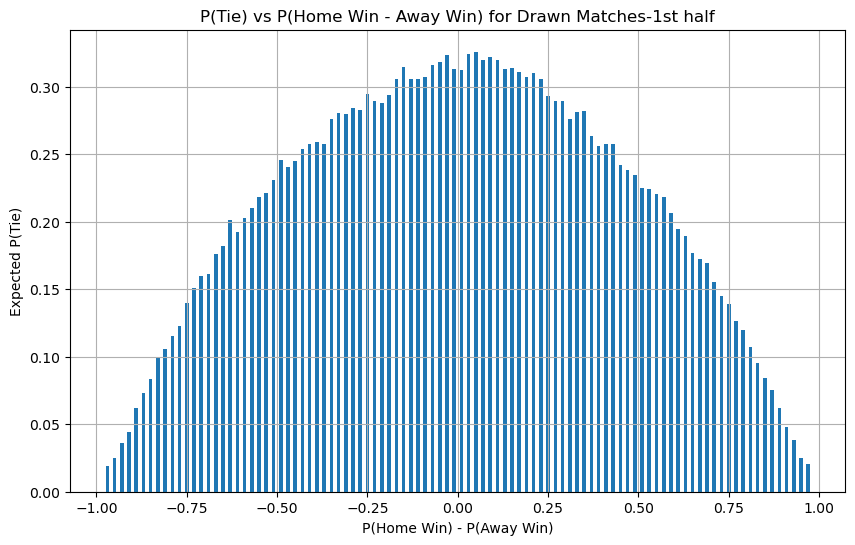

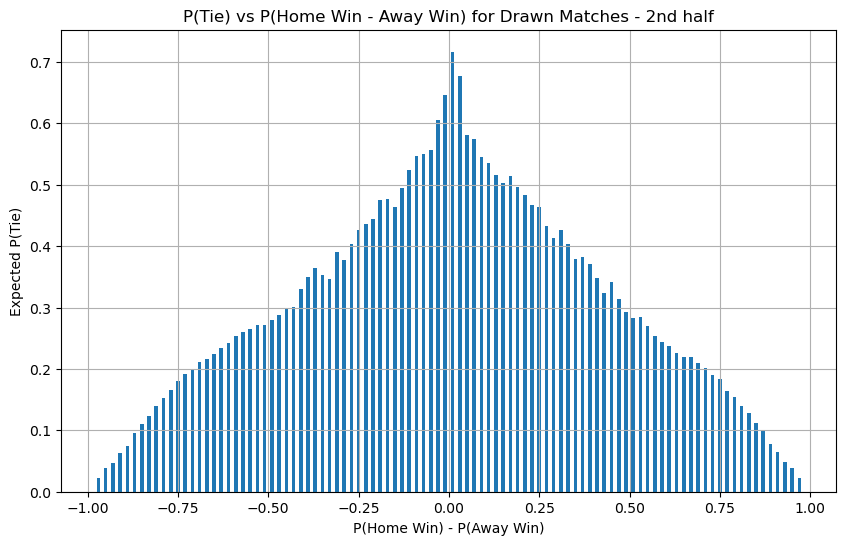

In [ ]:
match_draws = match_data
bins = np.arange(-1, 1.02, 0.02) 


half_data_1 = match_draws[match_draws["halftime"] == "1st-half"].copy()
half_data_2 = match_draws[match_draws["halftime"] == "2nd-half"].copy()

half_data_1_a['Exp_Bin'] = pd.cut(half_data_1_a["P:Home"] - half_data_1_a["P:Away"], bins)
draw_counts = half_data_1_a[half_data_1_a["result"] == "X"].groupby("Exp_Bin",observed=False).size()
tie_avg_1 = half_data_1.groupby("Exp_Bin",observed=False)["P:Tie"].mean()


half_data_2['Exp_Bin'] = pd.cut(half_data_2["P:Home"] - half_data_2["P:Away"], bins)
draw_counts = half_data_2[half_data_2["result"] == "X"].groupby("Exp_Bin",observed=False).size()
tie_avg_2 = half_data_2.groupby("Exp_Bin",observed=False)["P:Tie"].mean()


plt.figure(figsize=(10, 6))
plt.bar(tie_avg_1.index.categories.mid, tie_avg_1, width=0.01, align="center")
plt.xlabel("P(Home Win) - P(Away Win)")
plt.ylabel("Expected P:Tie")
plt.title("P:Tie vs P(Home Win - Away Win) for Drawn Matches-1st half")
plt.grid(True)
plt.show()

plt.figure(figsize=(10, 6))
plt.bar(tie_avg_2.index.categories.mid, tie_avg_2, width=0.01, align="center")
plt.xlabel("P(Home Win) - P(Away Win)")
plt.ylabel("Expected P:Tie")
plt.title("P:Tie vs P(Home Win - Away Win) for Drawn Matches - 2nd half")
plt.grid(True)
plt.show()



The first graph is for the first half, and the second graph is for the second half. As can be observed, the second graph shows more accumulation in the middle, which suggests that we can infer more from the difference between home probabilities and away probabilities in the second half, as expected. (since as we get closer to the end of match, the tie probabilities are more consistent). 

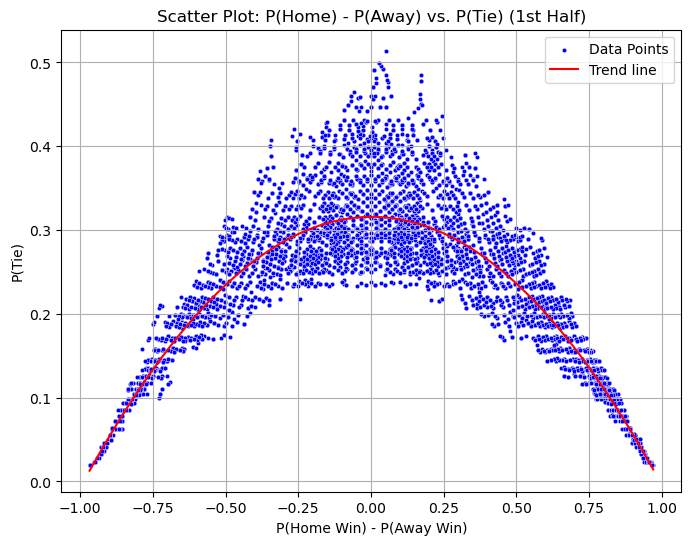

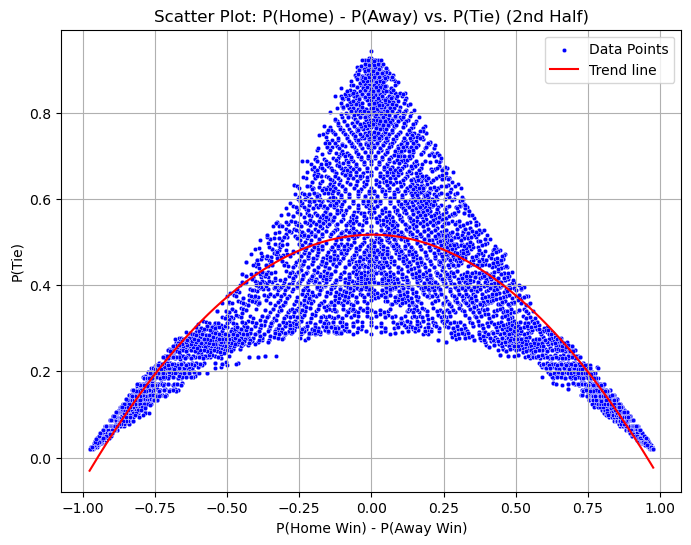

In [61]:

plt.figure(figsize=(8, 6))

# Scatter plot
sns.scatterplot(
    x=half_data_1_a["P:Home"] - half_data_1_a["P:Away"], 
    y=half_data_1_a["P:Tie"], 
    s=10, color="blue", label="Data Points"
)

# Fit a 2nd-degree polynomial
x = half_data_1_a["P:Home"] - half_data_1_a["P:Away"]
y = half_data_1_a["P:Tie"]
coeffs = np.polyfit(x, y, deg=2)
poly = np.poly1d(coeffs)

# Generate trend line
x_range = np.linspace(x.min(), x.max(), 500)
y_fit = poly(x_range)

# Plot the trend line
plt.plot(x_range, y_fit, color="red", label="Trend line")
plt.xlabel("P(Home Win) - P(Away Win)")
plt.ylabel("P:Tie")
plt.title("Scatter Plot: P:Home - P:Away vs. P:Tie (1st Half)")
plt.grid(True)
plt.legend()
plt.show()

# 2nd Half
plt.figure(figsize=(8, 6))

# Scatter plot
sns.scatterplot(
    x=half_data_2["P:Home"] - half_data_2["P:Away"], 
    y=half_data_2["P:Tie"], 
    s=10, color="blue", label="Data Points"
)

# Fit a 2nd-degree polynomial
x = half_data_2["P:Home"] - half_data_2["P:Away"]
y = half_data_2["P:Tie"]
coeffs = np.polyfit(x, y, deg=2)
poly = np.poly1d(coeffs)

# Generate trend line
x_range = np.linspace(x.min(), x.max(), 500)
y_fit = poly(x_range)

# Plot the trend line
plt.plot(x_range, y_fit, color="red", label="Trend line")
plt.xlabel("P(Home Win) - P(Away Win)")
plt.ylabel("P:Tie")
plt.title("Scatter Plot: P:Home - P:Away vs. P:Tie (2nd Half)")
plt.grid(True)
plt.legend()
plt.show()

/var/folders/5c/gss6wq6d0rv7hkxjknq53f_r0000gn/T/ipykernel_74481/617636977.py:25: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  half_data_1.groupby("P:Home - P:Away Bin")["result"]


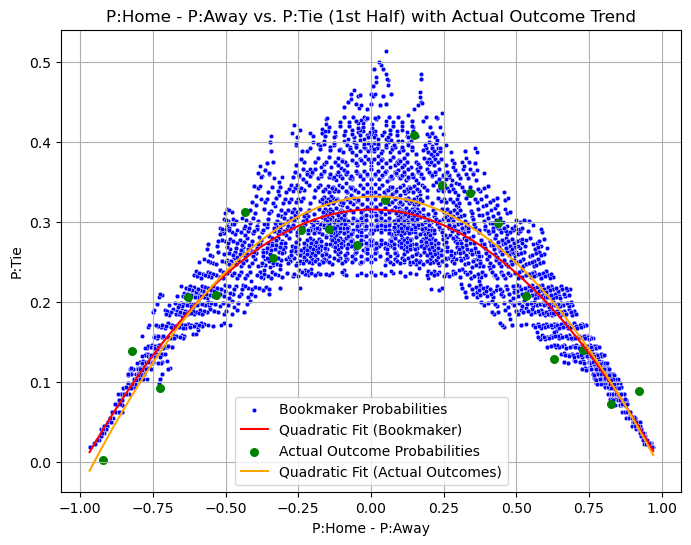

/var/folders/5c/gss6wq6d0rv7hkxjknq53f_r0000gn/T/ipykernel_74481/617636977.py:69: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  half_data_2.groupby("P:Home - P:Away Bin")["result"]


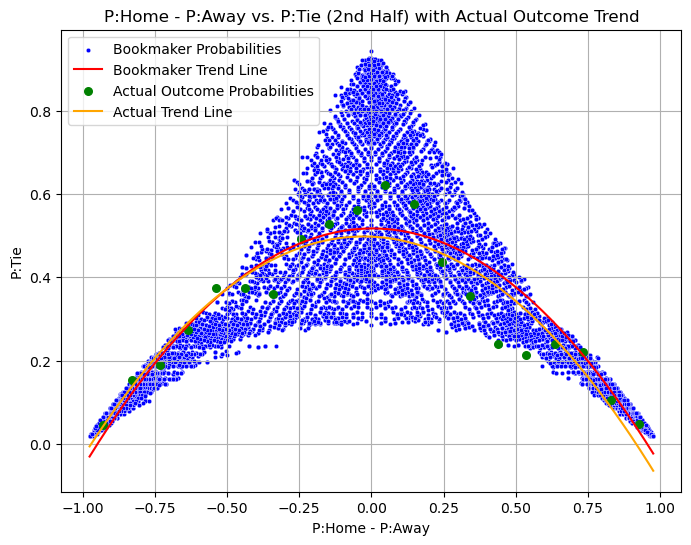

In [67]:


num_bins = 20

# 1st Half
plt.figure(figsize=(8, 6))

# Scatter plot for bookmaker probabilities
sns.scatterplot(
    x=half_data_1_a["P:Home"] - half_data_1_a["P:Away"], 
    y=half_data_1_a["P:Tie"], 
    s=10, color="blue", label="Bookmaker Probabilities"
)

# Fit a 2nd-degree polynomial for bookmaker probabilities
x = half_data_1_a["P:Home"] - half_data_1_a["P:Away"]
y = half_data_1_a["P:Tie"]
coeffs = np.polyfit(x, y, deg=2)
poly = np.poly1d(coeffs)
x_range = np.linspace(x.min(), x.max(), 500)
y_fit = poly(x_range)
plt.plot(x_range, y_fit, color="red", label="Bookmaker Trend Line")

# Compute actual outcome probabilities
half_data_1_a["P:Home - P:Away Bin"] = pd.cut(x, bins=num_bins)
actual_probabilities = (
    half_data_1.groupby("P:Home - P:Away Bin")["result"]
    .apply(lambda group: (group == "X").mean())  # Fraction of matches ending in a draw
)

# Plot actual outcome probabilities
bin_centers = actual_probabilities.index.categories.mid
plt.scatter(bin_centers, actual_probabilities, color="green", s=30, label="Actual Outcome Probabilities")

# Fit a trend line to the actual probabilities
actual_coeffs = np.polyfit(bin_centers, actual_probabilities, deg=2)
actual_poly = np.poly1d(actual_coeffs)
actual_fit = actual_poly(x_range)
plt.plot(x_range, actual_fit, color="orange", label="Actual Trend Line")

# Finalize the plot
plt.xlabel("P:Home - P:Away")
plt.ylabel("P:Tie")
plt.title("P:Home - P:Away vs. P:Tie (1st Half) with Actual Outcome Trend")
plt.grid(True)
plt.legend()
plt.show()

# 2nd Half
plt.figure(figsize=(8, 6))

# Scatter plot for bookmaker probabilities
sns.scatterplot(
    x=half_data_2["P:Home"] - half_data_2["P:Away"], 
    y=half_data_2["P:Tie"], 
    s=10, color="blue", label="Bookmaker Probabilities"
)

# Fit a 2nd-degree polynomial for bookmaker probabilities
x = half_data_2["P:Home"] - half_data_2["P:Away"]
y = half_data_2["P:Tie"]
coeffs = np.polyfit(x, y, deg=2)
poly = np.poly1d(coeffs)
x_range = np.linspace(x.min(), x.max(), 500)
y_fit = poly(x_range)
plt.plot(x_range, y_fit, color="red", label="Bookmaker Trend Line")

# Compute actual outcome probabilities
half_data_2["P:Home - P:Away Bin"] = pd.cut(x, bins=num_bins)
actual_probabilities = (
    half_data_2.groupby("P:Home - P:Away Bin")["result"]
    .apply(lambda group: (group == "X").mean())  # Fraction of matches ending in a draw
)

# Plot actual outcome probabilities
bin_centers = actual_probabilities.index.categories.mid
plt.scatter(bin_centers, actual_probabilities, color="green", s=30, label="Actual Outcome Probabilities")

# Fit a trend line to the actual probabilities
actual_coeffs = np.polyfit(bin_centers, actual_probabilities, deg=2)
actual_poly = np.poly1d(actual_coeffs)
actual_fit = actual_poly(x_range)
plt.plot(x_range, actual_fit, color="orange", label="Actual Trend Line")

# Finalize the plot
plt.xlabel("P:Home - P:Away")
plt.ylabel("P:Tie")
plt.title("P:Home - P:Away vs. P:Tie (2nd Half) with Actual Outcome Trend")
plt.grid(True)
plt.legend()
plt.show()

When we compare the red and the orange lines (trend line for the bookmaker and the actual outcome trend line), we observe a pretty good estimation by the bookmakers. This is in line with our assumptions, that the margins for the bookmakers are relatively small and this is close to a fair bet. This also indicates, that the people did a pretty good job in estimating the outcomes of the game (We can interpret the bookmaker probabilities as such, since the odds change according to the bets.) Because these estimations are very accurate, we would expect to see 1,2 and X columns as pretty good estimators in the feature importance analysis in the following parts.

*Task 2 - Special Cases

In [71]:
# Filter matches with events after the 90th minute
events_after_90 = match_data[match_data["minute"] > 90]

goals_after_90 = events_after_90[
    (events_after_90["Goals - away"] > 0) | (events_after_90["Goals - home"] > 0)
]["fixture_id"].unique()

early_red_card_matches = match_data[
    (match_data["minute"] < 10) &
    ((match_data['Redcards - home'] > 0) | (match_data['Redcards - away'] > 0))
    ]["fixture_id"].unique()

exclude_matches = set(goals_after_90).union(set(early_red_card_matches))
match_data_after_special = match_data[~match_data["fixture_id"].isin(exclude_matches)]

If there were any goals after the 90th minute, or any red cards in the first 10 minutes of the match, they were removed from the analysis to get a more consistent analysis and not take the "special cases" into consideration

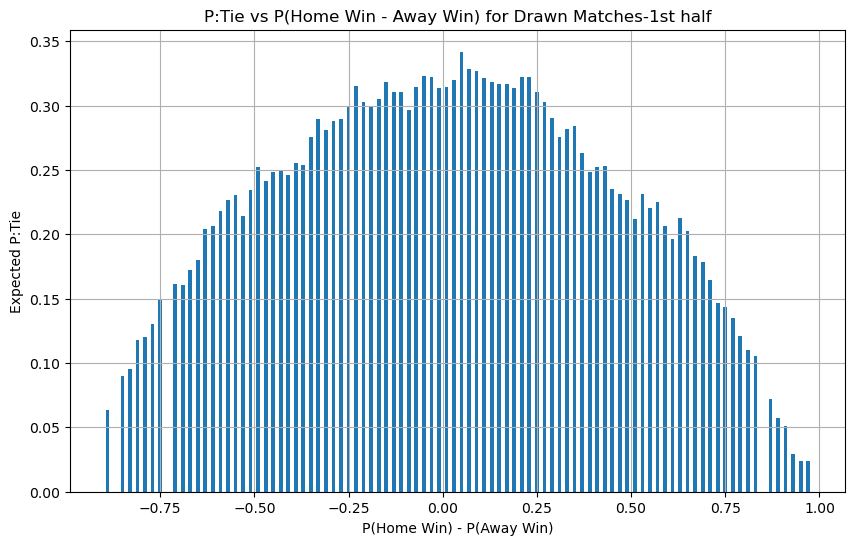

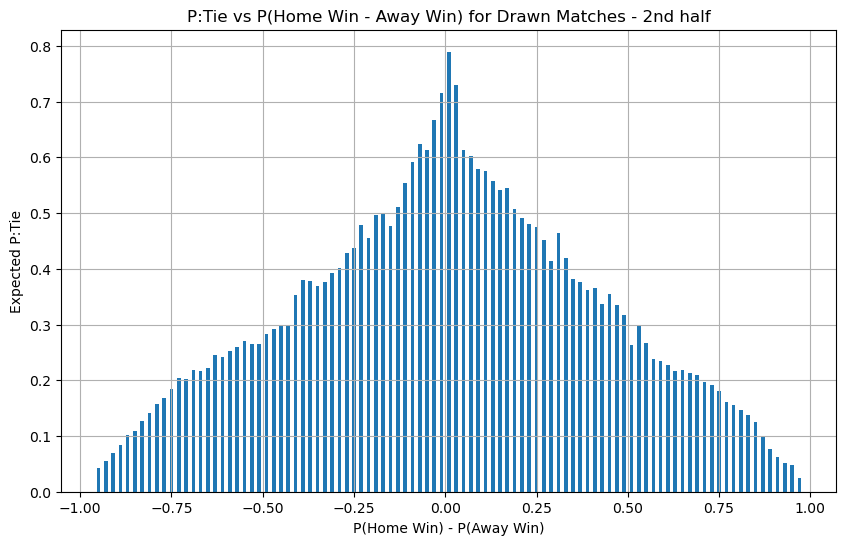

In [72]:
match_draws_after_special = match_data_after_special[match_data_after_special["result"] == "X"].copy()
bins = np.arange(-1, 1.02, 0.02) 


half_data_1_a = match_draws_after_special[match_draws_after_special["halftime"] == "1st-half"].copy()
half_data_2_a = match_draws_after_special[match_draws_after_special["halftime"] == "2nd-half"].copy()

half_data_1_a['Exp_Bin'] = pd.cut(half_data_1_a["P:Home"] - half_data_1_a["P:Away"], bins)
draw_counts = half_data_1_a[half_data_1_a["result"] == "X"].groupby("Exp_Bin",observed=False).size()
tie_avg_1_a = half_data_1_a.groupby("Exp_Bin",observed=False)["P:Tie"].mean()


half_data_2_a['Exp_Bin'] = pd.cut(half_data_2_a["P:Home"] - half_data_2_a["P:Away"], bins)
draw_counts = half_data_2_a[half_data_2_a["result"] == "X"].groupby("Exp_Bin",observed=False).size()
tie_avg_2_a = half_data_2_a.groupby("Exp_Bin",observed=False)["P:Tie"].mean()


plt.figure(figsize=(10, 6))
plt.bar(tie_avg_1_a.index.categories.mid, tie_avg_1_a, width=0.01, align="center")
plt.xlabel("P(Home Win) - P(Away Win)")
plt.ylabel("Expected P:Tie")
plt.title("P:Tie vs P(Home Win - Away Win) for Drawn Matches-1st half")
plt.grid(True)
plt.show()

plt.figure(figsize=(10, 6))
plt.bar(tie_avg_2_a.index.categories.mid, tie_avg_2_a, width=0.01, align="center")
plt.xlabel("P(Home Win) - P(Away Win)")
plt.ylabel("Expected P:Tie")
plt.title("P:Tie vs P(Home Win - Away Win) for Drawn Matches - 2nd half")
plt.grid(True)
plt.show()

/var/folders/5c/gss6wq6d0rv7hkxjknq53f_r0000gn/T/ipykernel_74481/462881349.py:25: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  half_data_1.groupby("P:Home - P:Away Bin")["result"]


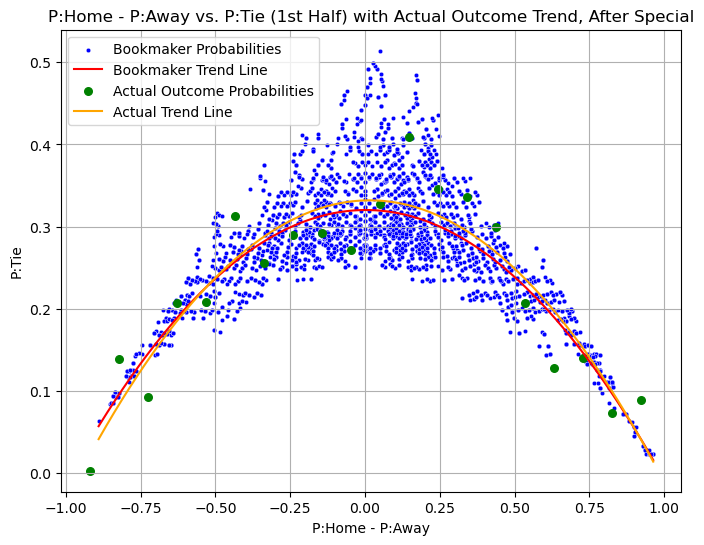

/var/folders/5c/gss6wq6d0rv7hkxjknq53f_r0000gn/T/ipykernel_74481/462881349.py:69: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  half_data_2.groupby("P:Home - P:Away Bin")["result"]


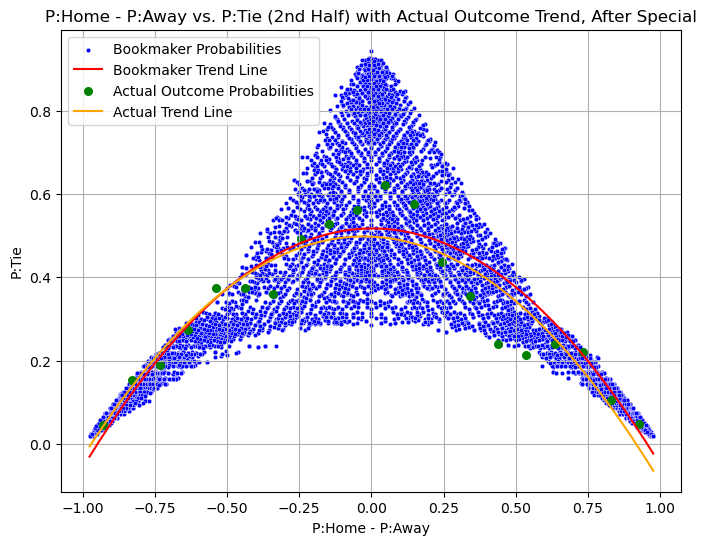

In [73]:


num_bins = 20

# 1st Half
plt.figure(figsize=(8, 6))

# Scatter plot for bookmaker probabilities
sns.scatterplot(
    x=half_data_1_a["P:Home"] - half_data_1_a["P:Away"], 
    y=half_data_1_a["P:Tie"], 
    s=10, color="blue", label="Bookmaker Probabilities"
)

# Fit a 2nd-degree polynomial for bookmaker probabilities
x = half_data_1_a["P:Home"] - half_data_1_a["P:Away"]
y = half_data_1_a["P:Tie"]
coeffs = np.polyfit(x, y, deg=2)
poly = np.poly1d(coeffs)
x_range = np.linspace(x.min(), x.max(), 500)
y_fit = poly(x_range)
plt.plot(x_range, y_fit, color="red", label="Bookmaker Trend Line")

# Compute actual outcome probabilities
half_data_1_a["P:Home - P:Away Bin"] = pd.cut(x, bins=num_bins)
actual_probabilities = (
    half_data_1.groupby("P:Home - P:Away Bin")["result"]
    .apply(lambda group: (group == "X").mean())  # Fraction of matches ending in a draw
)

# Plot actual outcome probabilities
bin_centers = actual_probabilities.index.categories.mid
plt.scatter(bin_centers, actual_probabilities, color="green", s=30, label="Actual Outcome Probabilities")

# Fit a trend line to the actual probabilities
actual_coeffs = np.polyfit(bin_centers, actual_probabilities, deg=2)
actual_poly = np.poly1d(actual_coeffs)
actual_fit = actual_poly(x_range)
plt.plot(x_range, actual_fit, color="orange", label="Actual Trend Line")

# Finalize the plot
plt.xlabel("P:Home - P:Away")
plt.ylabel("P:Tie")
plt.title("P:Home - P:Away vs. P:Tie (1st Half) with Actual Outcome Trend, After Special")
plt.grid(True)
plt.legend()
plt.show()

# 2nd Half
plt.figure(figsize=(8, 6))

# Scatter plot for bookmaker probabilities
sns.scatterplot(
    x=half_data_2["P:Home"] - half_data_2["P:Away"], 
    y=half_data_2["P:Tie"], 
    s=10, color="blue", label="Bookmaker Probabilities"
)

# Fit a 2nd-degree polynomial for bookmaker probabilities
x = half_data_2["P:Home"] - half_data_2["P:Away"]
y = half_data_2["P:Tie"]
coeffs = np.polyfit(x, y, deg=2)
poly = np.poly1d(coeffs)
x_range = np.linspace(x.min(), x.max(), 500)
y_fit = poly(x_range)
plt.plot(x_range, y_fit, color="red", label="Bookmaker Trend Line")

# Compute actual outcome probabilities
half_data_2["P:Home - P:Away Bin"] = pd.cut(x, bins=num_bins)
actual_probabilities = (
    half_data_2.groupby("P:Home - P:Away Bin")["result"]
    .apply(lambda group: (group == "X").mean())  # Fraction of matches ending in a draw
)

# Plot actual outcome probabilities
bin_centers = actual_probabilities.index.categories.mid
plt.scatter(bin_centers, actual_probabilities, color="green", s=30, label="Actual Outcome Probabilities")

# Fit a trend line to the actual probabilities
actual_coeffs = np.polyfit(bin_centers, actual_probabilities, deg=2)
actual_poly = np.poly1d(actual_coeffs)
actual_fit = actual_poly(x_range)
plt.plot(x_range, actual_fit, color="orange", label="Actual Trend Line")

# Finalize the plot
plt.xlabel("P:Home - P:Away")
plt.ylabel("P:Tie")
plt.title("P:Home - P:Away vs. P:Tie (2nd Half) with Actual Outcome Trend, After Special")
plt.grid(True)
plt.legend()
plt.show()

We have performed the same analysis in Task 1 after the elimination of special cases. Here, we observe a better fit in the first few minutes of the match, so we can say that removing the matches during which a red card has been issued in the first 10 minutes of the match helped  for our fit.

Task 3: See the correlation between variables:

In [74]:
match_data_after_special = match_data_after_special.groupby("fixture_id").apply(lambda group: group.ffill())
match_data_after_special.reset_index(drop=True, inplace=True)
print(match_data_after_special.isna().sum())

match_data_after_special.fillna(0, inplace=True)
print(match_data_after_special.isna().sum())


fixture_id              0
halftime                0
current_time            0
half_start_datetime     0
match_start_datetime    0
                       ..
Total odds              0
P:Home                  0
P:Away                  0
P:Tie                   0
P:Home - P:Away         0
Length: 111, dtype: int64
fixture_id              0
halftime                0
current_time            0
half_start_datetime     0
match_start_datetime    0
                       ..
Total odds              0
P:Home                  0
P:Away                  0
P:Tie                   0
P:Home - P:Away         0
Length: 111, dtype: int64


To start the analysis, I decided to see how correlated the variables were, in order to have an overview. I made a list of the variables that had correlations of more than 80%. Goals and Assists columns had over 85% correlation in both home and away teams.

In [75]:
numerical_columns = match_data_after_special.select_dtypes(include=[np.number]).columns
numerical_data=match_data_after_special[numerical_columns]

data_first_half = match_data_after_special[match_data_after_special["halftime"] == "1st-half"].copy()
data_second_half = match_data_after_special[match_data_after_special["halftime"] == "2nd-half"].copy()

home_columns = numerical_data.columns[numerical_data.columns.str.contains("home")]
away_columns = numerical_data.columns[numerical_data.columns.str.contains("away")]

numerical_data_first_half_home=data_first_half[home_columns]
numerical_data_first_half_away=data_first_half[away_columns]
numerical_data_second_half_home=data_second_half[home_columns]
numerical_data_second_half_away=data_second_half[away_columns]

limit=0.8
correlation_home_1=numerical_data_first_half_home.corr()
high_corr_home_1 = correlation_home_1[correlation_home_1 >= limit]

correlation_home_2=numerical_data_second_half_home.corr()
high_corr_home_2 = correlation_home_2[correlation_home_1 >= limit]

correlation_away_1=numerical_data_first_half_away.corr()
high_corr_away_1 = correlation_away_1[correlation_away_1 >= limit]

correlation_away_2=numerical_data_second_half_away.corr()
high_corr_away_2 = correlation_away_2[correlation_away_2 >= limit]


correlation_results = {}
correlation_results["First Half - Home"] = high_corr_home_1
correlation_results["Second Half - Home"] = high_corr_home_2
correlation_results["First Half - Away"] = high_corr_away_1
correlation_results["Second Half - Away"] = high_corr_away_2



for key, corr_matrix in correlation_results.items():
    filtered_matrix = corr_matrix.where(corr_matrix >= limit)  
    cleaned_matrix = filtered_matrix.dropna(how="all").dropna(axis=1, how="all")  
    table = (
        cleaned_matrix
        .stack()  
        .reset_index()  
    )
    table.columns = ["Variable 1", "Variable 2", "Correlation"]  
  
    table = table[table["Variable 1"] != table["Variable 2"]]
    print(f"Number of high-correlated variables: {len(table)}",table)
    print("\n")


Number of high-correlated variables: 22                          Variable 1                       Variable 2  \
2                    Assists - home                     Goals - home   
4                    Attacks - home         Dangerous Attacks - home   
5                    Attacks - home                    Passes - home   
6                    Attacks - home         Successful Passes - home   
10                Challenges - home             Interceptions - home   
13         Dangerous Attacks - home                   Attacks - home   
20                     Goals - home                   Assists - home   
23                   Headers - home        Successful Headers - home   
26             Interceptions - home                Challenges - home   
29                Key Passes - home           Shots Insidebox - home   
30                Key Passes - home               Shots Total - home   
33                    Passes - home                   Attacks - home   
35                    Pa

In [ ]:
def perform_pca(corr_matrix, n_components=15):
    corr_matrix = corr_matrix.fillna(0).to_numpy()
    pca = PCA(n_components=n_components)
    pca.fit(corr_matrix)
    return pca.components_, pca.explained_variance_ratio_

for key, corr_matrix in correlation_results.items():
    print(f"PCA on {key} - Correlation Matrix:\n")
    
    cleaned_matrix = corr_matrix.where(corr_matrix >= limit).fillna(0)
    components, explained_variance = perform_pca(cleaned_matrix)
   
    print("Principal Components:",key)
    print(components)
    print("\nExplained Variance Ratio:")
    print(explained_variance)
    print("\n")




PCA on First Half - Home - Correlation Matrix:

Principal Components: First Half - Home
[[-7.39054601e-03 -1.91537636e-02  5.28430338e-01 -7.39054601e-03
  -7.39054601e-03 -2.43583475e-02 -7.39054601e-03 -7.39054601e-03
   2.15755558e-01 -7.39054601e-03 -7.39054601e-03 -7.39054601e-03
  -7.39054601e-03 -7.39054601e-03 -1.91537636e-02 -2.30732662e-02
  -7.39054601e-03 -7.39054601e-03 -2.43583475e-02 -2.54352487e-01
  -7.39054601e-03 -7.39054601e-03  4.88772400e-01 -7.39054601e-03
  -7.39054601e-03 -7.39054601e-03 -7.39054601e-03 -7.39054601e-03
  -2.52085763e-01 -7.39054601e-03 -7.39054601e-03 -7.39054601e-03
  -2.58096244e-01 -7.39054601e-03 -7.39054601e-03 -2.30732662e-02
  -1.96863309e-02  4.84939951e-01 -7.39054601e-03 -1.96863309e-02
  -7.39054601e-03 -7.39054601e-03 -7.39054601e-03  0.00000000e+00]
 [-1.90408460e-02 -5.41085550e-02  2.44551230e-01 -1.90408460e-02
  -1.90408460e-02 -7.23700322e-02 -1.90408460e-02 -1.90408460e-02
   9.38998721e-02 -1.90408460e-02 -1.90408460e-02 -1.

As there were many variables that were highly correlated, I performed PCA for dimensionality reduction. I placed my cutoff where I was able to preserve 80% of the variance information.

In [78]:
from sklearn.decomposition import PCA


def perform_pca(corr_matrix):
    # Fill NaN values with 0 and convert to a numpy array
    corr_matrix = corr_matrix.fillna(0).to_numpy()
    pca = PCA()
    transformed_data = pca.fit_transform(corr_matrix)  # Transform the data into principal components
    return pca, transformed_data

# Store results
pca_results = {}

for key, corr_matrix in correlation_results.items():
    print(f"PCA on {key} - Correlation Matrix:\n")
    
    # Clean the correlation matrix and fill NaN values
    cleaned_matrix = corr_matrix.where(corr_matrix >= limit).fillna(0)
    
    # Perform PCA
    pca, transformed_data = perform_pca(cleaned_matrix)
    
    # Compute cumulative explained variance ratio
    cumulative_variance = np.cumsum(pca.explained_variance_ratio_)
    n_components_to_explain_80 = np.argmax(cumulative_variance >= 0.8) + 1  # Find number of components for 80%
    
    # Transform data to include only these components
    reduced_data = transformed_data[:, :n_components_to_explain_80]
    
    # Store PCA results
    pca_results[key] = {
        "pca_model": pca,
        "transformed_data": reduced_data,
        "explained_variance_ratio": pca.explained_variance_ratio_,
        "components": pca.components_,
        "n_components": n_components_to_explain_80
    }
    
    # Print results
    print(f"Principal Components for {key} (80% Variance): {n_components_to_explain_80}")
    print(f"Explained Variance Ratio (80%): {cumulative_variance[:n_components_to_explain_80]}")
    print("\n")

# Example: Create a DataFrame for one specific key
key_to_use = list(pca_results.keys())[0]  # Replace with the desired key
reduced_data = pca_results[key_to_use]["transformed_data"]

# Create a DataFrame with selected components
reduced_df = pd.DataFrame(reduced_data, columns=[f"PC{i+1}" for i in range(reduced_data.shape[1])])
print(reduced_df.head())

PCA on First Half - Home - Correlation Matrix:

Principal Components for First Half - Home (80% Variance): 23
Explained Variance Ratio (80%): [0.14522744 0.26892628 0.33591858 0.39876692 0.45549756 0.50524405
 0.53284331 0.55002685 0.5672104  0.58439395 0.60157749 0.61876104
 0.63594459 0.65312813 0.67031168 0.68749523 0.70467877 0.72186232
 0.73904587 0.75622941 0.77341296 0.79059651 0.80778005]


PCA on Second Half - Home - Correlation Matrix:

Principal Components for Second Half - Home (80% Variance): 26
Explained Variance Ratio (80%): [0.13420031 0.20969192 0.28312872 0.3508685  0.40870929 0.42771504
 0.44672079 0.46572653 0.48473228 0.50373803 0.52274378 0.54174953
 0.56075528 0.57976103 0.59876677 0.61777252 0.63677827 0.65578402
 0.67478977 0.69379552 0.71280127 0.73180702 0.75081276 0.76981851
 0.78882426 0.80783001]


PCA on First Half - Away - Correlation Matrix:

Principal Components for First Half - Away (80% Variance): 23
Explained Variance Ratio (80%): [0.14356329 0.2644

Additional analysis: I would like to observe the correlation between the same elements for home and away teams. That is: Is there any correlation between the Assists(or any other vars) of home and away teams?

In [23]:
print(numerical_data.head)
y= match_data_after_special["result"]
print(y)

<bound method NDFrame.head of        fixture_id  minute  second     1      2     X  Accurate Crosses - away  \
0      19134453.0       0      48  1.66    5.0   4.0                      0.0   
1      19134453.0       1      47  1.66    5.0   4.0                      0.0   
2      19134453.0       2      48  1.61    5.5   4.0                      0.0   
3      19134453.0       3      47  1.61    5.0   4.0                      0.0   
4      19134453.0       4      48  1.61    5.0   4.0                      0.0   
...           ...     ...     ...   ...    ...   ...                      ...   
52842  19172117.0      32      45  1.00  401.0  51.0                      3.0   
52843  19172117.0      33      45  1.00  401.0  51.0                      3.0   
52844  19172117.0      34      46  1.00  351.0  51.0                      3.0   
52845  19172117.0      35      45  1.00  401.0  51.0                      3.0   
52846  19172117.0      36      45  1.00  401.0  51.0                      3.0  

In [80]:
home_base_names = home_columns.str.replace("- home", "",regex=True)
away_base_names = away_columns.str.replace("- away", "",regex=True)

matching_variables = home_base_names[home_base_names.isin(away_base_names)]
correlation_features = []

for fixture_id, group in numerical_data.groupby("fixture_id"):
    correlations = {"fixture_id": fixture_id}
    for var in matching_variables:
        home_col = f"{var}- home"
        away_col = f"{var}- away"
        if home_col in group.columns and away_col in group.columns:
            correlations[f"correlation_{var}"] = group[home_col].corr(group[away_col])
    correlation_features.append(correlations)

x = pd.DataFrame(correlation_features)
y = match_data_after_special.groupby("fixture_id")["result"].first().values

print(f"Shape of x: {x.shape}")
print(f"Shape of y: {y.shape}")
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
print(x)



/Users/dogaercin/anaconda3/lib/python3.11/site-packages/numpy/lib/function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/Users/dogaercin/anaconda3/lib/python3.11/site-packages/numpy/lib/function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


Shape of x: (610, 45)
Shape of y: (610,)
     fixture_id  correlation_Accurate Crosses   correlation_Assists   \
0    19134453.0                       0.790794                   NaN   
1    19134454.0                       0.507244                   NaN   
2    19134455.0                       0.912443                   NaN   
3    19134456.0                       0.623067                   NaN   
4    19134458.0                       0.841847                   NaN   
..          ...                            ...                   ...   
605  19172113.0                       0.756420                   NaN   
606  19172114.0                       0.935665              0.613752   
607  19172115.0                       0.822471              0.850720   
608  19172116.0                       0.689803              0.726872   
609  19172117.0                       0.839012                   NaN   

     correlation_Attacks   correlation_Ball Possession %   \
0                0.956185        

Especially in "Attacks", we observe a correlation. This analysis was performed to obtain an overview of the match, but actually PCA deals with these highly correlated columns. This will prove useful (I hope) in the project.

Now, I fit a decision tree to the dataset (for numerical columns), without the dimensionality reduction with PCA. I fit 2 different trees for the first half data and the second half data separately.

Classification Report:
              precision    recall  f1-score   support

           1       0.69      0.77      0.73      4569
           2       0.64      0.72      0.68      3092
           X       0.56      0.37      0.45      2909

    accuracy                           0.65     10570
   macro avg       0.63      0.62      0.62     10570
weighted avg       0.64      0.65      0.63     10570

Accuracy: 0.65


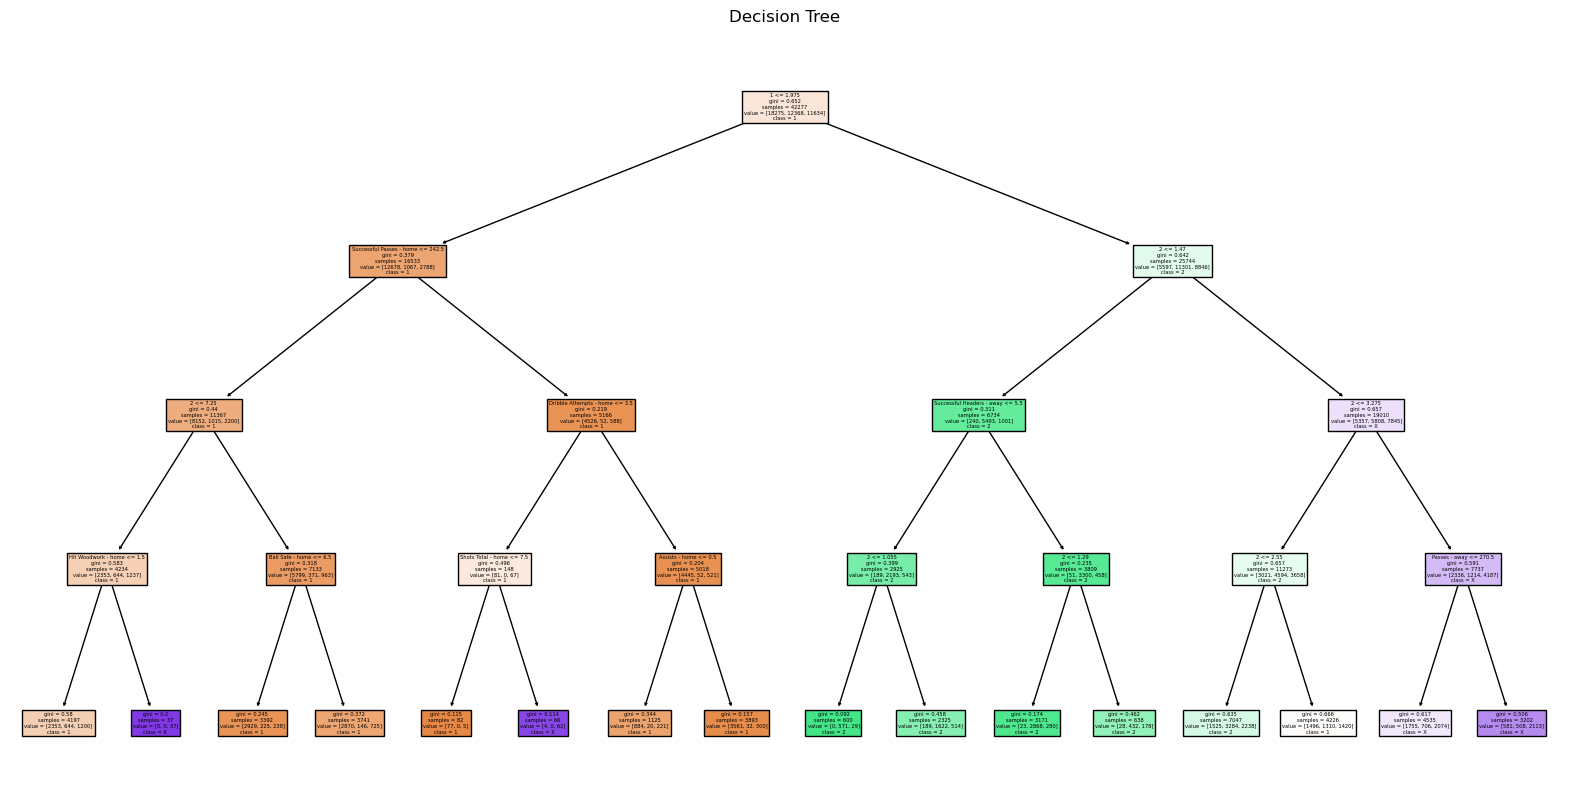

Feature Importance:
                     Feature  Importance
3                          1    0.579828
4                          2    0.357006
50             Passes - away    0.019047
81  Successful Passes - home    0.016401
71        Shots Total - home    0.006876
..                       ...         ...
32         Goal Kicks - away    0.000000
31      Goal Attempts - home    0.000000
30      Goal Attempts - away    0.000000
29         Free Kicks - home    0.000000
94                Total odds    0.000000

[95 rows x 2 columns]


In [82]:

match_data_after_special["halftime"] = match_data_after_special["halftime"].replace({
    "1st-half": 1,
    "2nd-half": 2
})


numerical_columns = match_data_after_special.select_dtypes(include=[np.number]).columns
tree_columns = [col for col in numerical_columns if col not in ['fixture_id','P:Home','P:Tie','P:Away','P:Home - P:Away']]
X = match_data_after_special[tree_columns]
y = match_data_after_special["result"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
clf = DecisionTreeClassifier(random_state=42, max_depth=4,max_features=20,min_samples_leaf=2)
clf.fit(X_train, y_train)
feature_importances = clf.feature_importances_

y_pred = clf.predict(X_test)

print("Classification Report:")
print(classification_report(y_test, y_pred, target_names=["1", "2", "X"]))
print(f"Accuracy: {accuracy_score(y_test, y_pred):.2f}")

plt.figure(figsize=(20, 10))
plot_tree(clf, feature_names=X.columns, class_names=clf.classes_, filled=True)
plt.title("Decision Tree")
plt.show()

importance_df = pd.DataFrame({
    "Feature": X.columns,
    "Importance": feature_importances
}).sort_values(by="Importance", ascending=False)

print("Feature Importance:")
print(importance_df)



As predicted, 1 and 2 columns (the bookmaker odd columns) have very much of an importance in the tree, and they are first and second with high importance values. We were able to reach up to 69% accuracy in 1(home win), 64% in away win (2) and 45% in ties. As we get deeper in the tree, this is expected to increase.

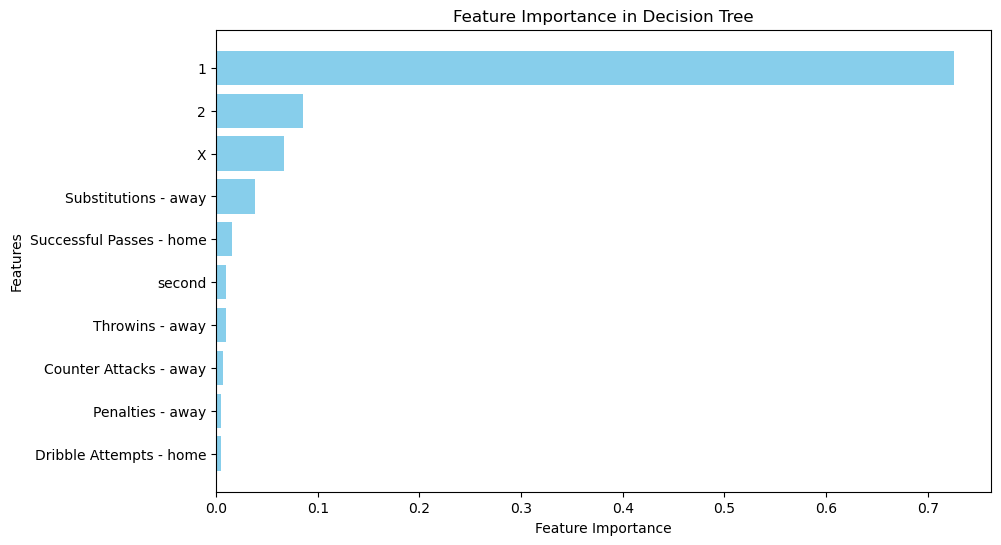

In [40]:
plt.figure(figsize=(10, 6))
top_10=importance_df.head(10)
plt.barh(top_10["Feature"], top_10["Importance"], color="skyblue")
plt.xlabel("Feature Importance")
plt.ylabel("Features")
plt.title("Feature Importance in Decision Tree")
plt.gca().invert_yaxis()  
plt.show()

Classification Report:
              precision    recall  f1-score   support

           1       0.67      0.81      0.73      4569
           2       0.67      0.68      0.68      3092
           X       0.55      0.38      0.45      2909

    accuracy                           0.65     10570
   macro avg       0.63      0.62      0.62     10570
weighted avg       0.64      0.65      0.64     10570

Accuracy: 0.65


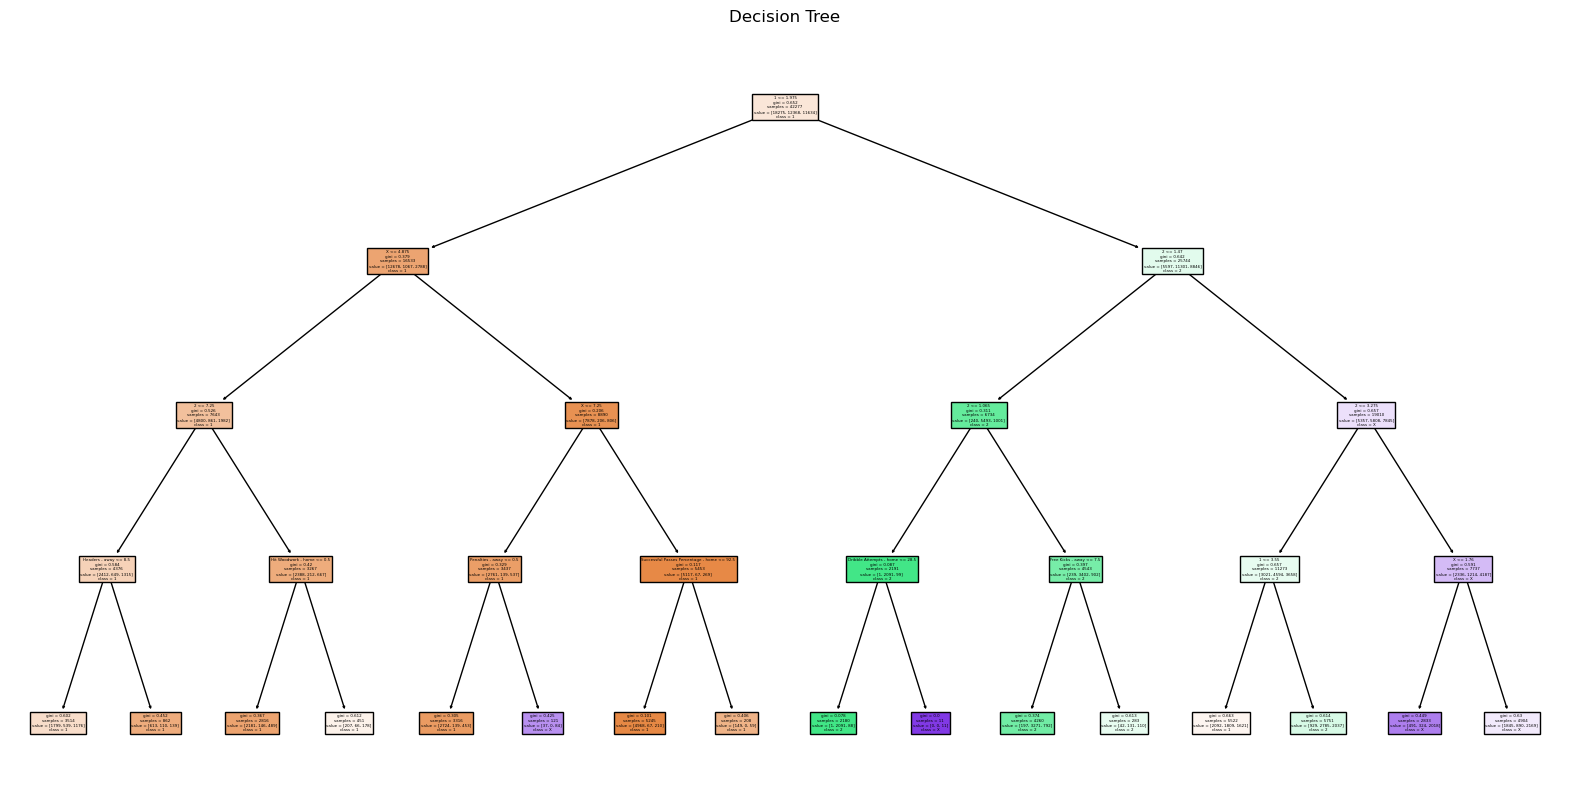

Feature Importance:
                 Feature  Importance
3                      1    0.579825
4                      2    0.308281
5                      X    0.081742
52      Penalties - away    0.007878
39   Hit Woodwork - home    0.007134
..                   ...         ...
32     Goal Kicks - away    0.000000
31  Goal Attempts - home    0.000000
30  Goal Attempts - away    0.000000
29     Free Kicks - home    0.000000
94            Total odds    0.000000

[95 rows x 2 columns]


In [86]:
numerical_columns = match_data_after_special.select_dtypes(include=[np.number]).columns
tree_columns = [col for col in numerical_columns if col not in ['fixture_id','P:Home','P:Tie','P:Away','P:Home - P:Away']]
X = match_data_after_special[tree_columns]
y = match_data_after_special["result"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
clf = DecisionTreeClassifier(random_state=42, max_depth=4)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
feature_importances_pca = clf.feature_importances_

print("Classification Report:")
print(classification_report(y_test, y_pred, target_names=["1", "2", "X"]))
print(f"Accuracy: {accuracy_score(y_test, y_pred):.2f}")

plt.figure(figsize=(20, 10))
plot_tree(clf, feature_names=X.columns, class_names=clf.classes_, filled=True)
plt.title("Decision Tree")
plt.show()

importance_df_pca = pd.DataFrame({
    "Feature": X.columns,
    "Importance": feature_importances_pca
}).sort_values(by="Importance", ascending=False)

print("Feature Importance:")
print(importance_df_pca)

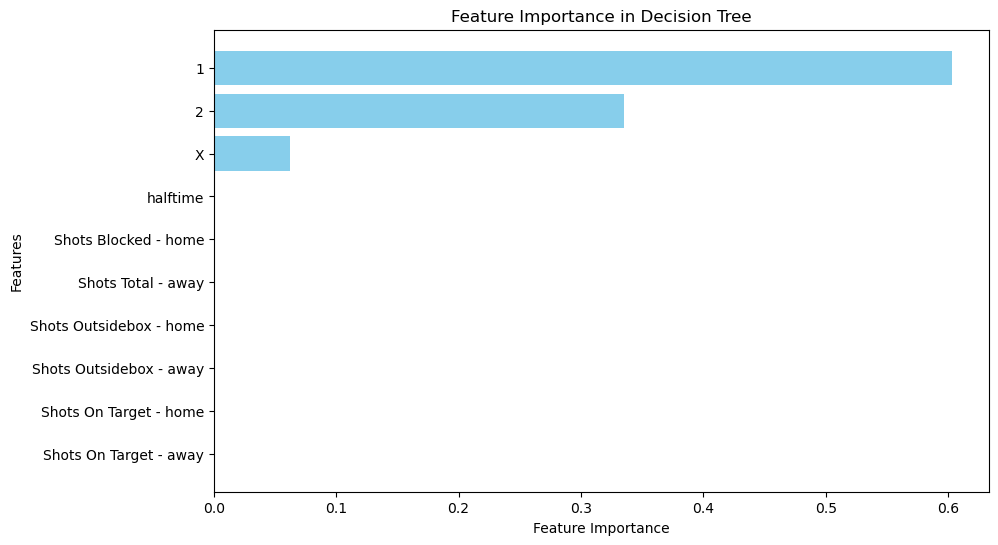

In [36]:
plt.figure(figsize=(10, 6))
top_10=importance_df_pca.head(10)
plt.barh(top_10["Feature"], top_10["Importance"], color="skyblue")
plt.xlabel("Feature Importance")
plt.ylabel("Features")
plt.title("Feature Importance in Decision Tree")
plt.gca().invert_yaxis()  
plt.show()

To petter analyse the importance of variables, I performed a permutation importance anlaysis. The result was not very different, but we observed once more that the bookmakers odds are pretty accurate and important.

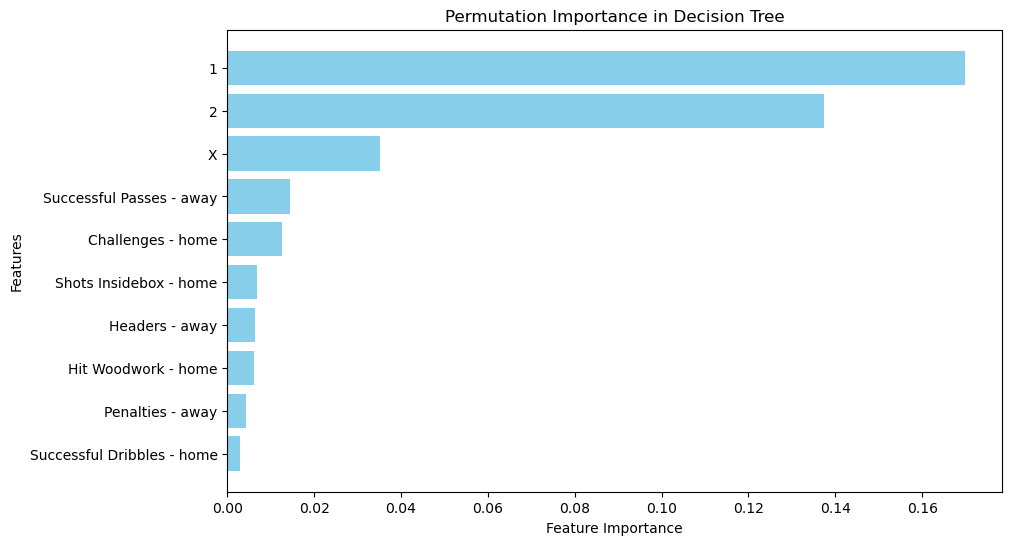

In [42]:
from sklearn.inspection import permutation_importance

result = permutation_importance(clf, X_test, y_test, n_repeats=10, random_state=42)
perm_importance_df = pd.DataFrame({
    "Feature": X.columns,
    "Importance": result.importances_mean
}).sort_values(by="Importance", ascending=False)



plt.figure(figsize=(10, 6))
top_10=perm_importance_df.head(10)
plt.barh(top_10["Feature"], top_10["Importance"], color="skyblue")
plt.xlabel("Feature Importance")
plt.ylabel("Features")
plt.title("Permutation Importance in Decision Tree")
plt.gca().invert_yaxis()  
plt.show()

Decision tree with PCA: Since we have very highly correlated variables, dimensionality reduced dataset allows us to infer more with less splits

In [84]:


def perform_pca(corr_matrix):
    # Fill NaN values with 0 and convert to a numpy array
    corr_matrix = corr_matrix.fillna(0).to_numpy()
    pca = PCA()
    transformed_data = pca.fit_transform(corr_matrix)  # Transform the data into principal components
    return pca, transformed_data

# Store results
pca_results = {}
all_transformed_data = []  # To store all transformed data
all_keys = []              # To track keys for each row of the transformed data

fixed_components = 10  # Use a fixed number of components

for key, corr_matrix in correlation_results.items():
    print(f"PCA on {key} - Correlation Matrix:\n")
    
    cleaned_matrix = corr_matrix.where(corr_matrix >= limit).fillna(0)
    pca, transformed_data = perform_pca(cleaned_matrix)
    
    # Always take the first `fixed_components`
    reduced_data = transformed_data[:, :fixed_components]
    
    pca_results[key] = {
        "pca_model": pca,
        "transformed_data": reduced_data,
        "explained_variance_ratio": pca.explained_variance_ratio_,
        "components": pca.components_,
        "n_components": fixed_components
    }
    
    all_transformed_data.append(reduced_data)
    all_keys.extend([key] * reduced_data.shape[0])

# Combine all datasets
all_transformed_data = np.vstack(all_transformed_data)
columns = [f"PC{i+1}" for i in range(fixed_components)]

# Create final DataFrame
reduced_df = pd.DataFrame(all_transformed_data, columns=columns)
reduced_df["key"] = all_keys

print("Full PCA-transformed dataset:")
print(reduced_df.head())

print("Full PCA-transformed dataset:")
print(reduced_df.head())

PCA on First Half - Home - Correlation Matrix:

PCA on Second Half - Home - Correlation Matrix:

PCA on First Half - Away - Correlation Matrix:

PCA on Second Half - Away - Correlation Matrix:

Full PCA-transformed dataset:
        PC1       PC2       PC3       PC4       PC5       PC6       PC7  \
0 -0.062461 -0.137069 -0.023466 -0.057096 -0.015564 -0.146380 -0.021503   
1 -0.089655 -0.215726 -0.106528 -0.381859 -0.866775  0.759729  0.007880   
2  1.516139  0.616276  0.016849  0.035689  0.007756  0.053105  0.352211   
3 -0.062461 -0.137069 -0.023466 -0.057096 -0.015564 -0.146380 -0.021503   
4 -0.062461 -0.137069 -0.023466 -0.057096 -0.015564 -0.146380 -0.021503   

            PC8           PC9          PC10                key  
0  9.819805e-01  2.016638e-17  1.726845e-17  First Half - Home  
1  1.387779e-17  5.436582e-16  3.550122e-17  First Half - Home  
2  3.122502e-16  3.754454e-16 -2.391693e-16  First Half - Home  
3 -3.636965e-02 -2.667403e-01 -1.267083e-01  First Half - Home  


In [ ]:

numerical_columns = reduced_df.select_dtypes(include=[float, int]).columns
X = reduced_df[numerical_columns]  

# Define the target variable
y = match_data_after_special["result"]  # Replace with the actual column name for your target


# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Initialize and train the decision tree classifier
clf = DecisionTreeClassifier(max_depth=4, random_state=42)
clf.fit(X_train, y_train)

# Predict on the test set
y_pred = clf.predict(X_test)

# Evaluate the model
print("Classification Report:")
print(classification_report(y_test, y_pred))
print(f"Accuracy: {accuracy_score(y_test, y_pred):.2f}")

Length of X after alignment: 176
Length of y after alignment: 176


ValueError: could not convert string to float: 'First Half - Home'